In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import pandas as pd
sns.set_style('whitegrid')
plt.rcParams.update({'font.size': 13})

In [3]:
parallel_data = pd.read_csv('grad_cost_parallel_calculation.csv')
parallel_data = parallel_data.drop(columns=["Unnamed: 4"])
parallel_data

,Hits,Time (1e-06s),Per Hit,%
0,258,3439161.0,13330.1,55.0
1,370,5002587.0,13520.5,59.9
2,173,2294752.0,13264.5,47.6
3,214,2844527.0,13292.2,52.2
4,429,5627282.0,13117.2,62.9
5,521,6896445.0,13236.9,64.2
6,290,3620553.0,12484.7,55.7
7,141,1676984.0,11893.5,41.4
8,281,3080187.0,10961.5,52.2
9,226,2784457.0,12320.6,50.3


In [55]:
(parallel_data['Hits'].iloc[0] * parallel_data['Per Hit'].iloc[0] ) * 1e-6

3.4391658

([<matplotlib.patches.Wedge at 0x7f37a4000ba8>,
 [Text(-1.189864627865954, -0.15563472412483975, 'Gradient Calculation'),
  Text(1.0907092288531763, 0.14266526590067202, 'All other tasks')],
 [Text(-0.6940876995884732, -0.0907869224061565, '54.14%'),
  Text(0.5949323066471871, 0.0778174177640029, '45.86%')])

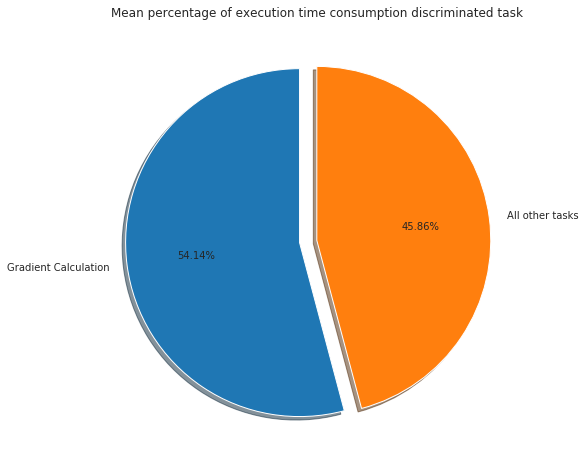

In [37]:
labels = 'Gradient Calculation', 'All other tasks'
mean_percentage = parallel_data['%'].mean()
rest = 100. - mean_percentage
sizes = [mean_percentage,rest]
explode = (.1, 0)
fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.set_title("Mean percentage of execution time consumption discriminated task")
ax1.pie(sizes,explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90)

Text(0, 0.5, 'Percentual cost')

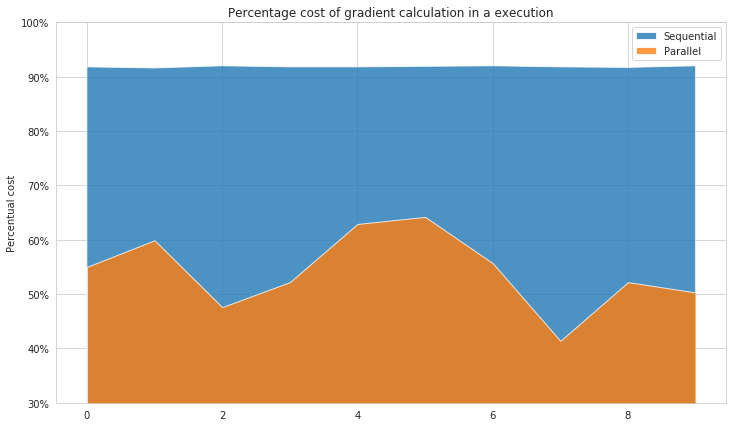

In [4]:
# Import second part of data to build comparative plot
linear_data = pd.read_csv('grad_cost_no_parallel_calculation.csv')
linear_data = linear_data.drop(columns=["Unnamed: 4"])

# Draw Plot and Annotate
fig, ax = plt.subplots(figsize=(12, 7))
labs = ['Sequential cost','Parallel Cost']

# Prepare data
linear = linear_data['%'].values.tolist()
parallel = parallel_data['%'].values.tolist()
y = np.vstack([linear, parallel])
x = range(10)

# Plot for each column
ax = plt.gca()
ax.stackplot(x, linear, alpha=0.8)
ax.stackplot(x, parallel, alpha=0.8)
ax.legend(['Sequential','Parallel'])

# Decorations
ax.set_title('Percentage cost of gradient calculation in a execution')
ax.set(ylim=[30, 100])
ax.yaxis.set_major_formatter(mticker.PercentFormatter())
plt.ylabel('Percentual cost')